In [3]:
from bs4 import BeautifulSoup
import urllib.request
from IPython.display import HTML
import re
import nltk
#download punkt for tokenization
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
#download wordnet for lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ankurrastogi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ankurrastogi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
url_list = ["https://en.wikipedia.org/wiki/Data_science", "https://en.wikipedia.org/wiki/Unstructured_data", "https://en.wikipedia.org/wiki/Data_mining", "https://en.wikipedia.org/wiki/Big_data", "https://en.wikipedia.org/wiki/Predictive_analytics", "https://en.wikipedia.org/wiki/User_behavior_analytics", "https://en.wikipedia.org/wiki/Machine_learning", "https://en.wikipedia.org/wiki/Statistics", "https://en.wikipedia.org/wiki/Database", "https://en.wikipedia.org/wiki/Data_management", "https://en.wikipedia.org/wiki/Data_pre-processing", "https://en.wikipedia.org/wiki/Data_visualization", "https://en.wikipedia.org/wiki/Data_warehouse", "https://en.wikipedia.org/wiki/Unstructured_data"]
unprocessed_word_bucket_list = [] 
for link in url_list:
#opened the wikipedia url
    http_response = urllib.request.urlopen(link)
    #read the url
    http_content = http_response.read()
    #content the text in url in a more readable format lxml
    html_content = BeautifulSoup(http_content, 'lxml')
    #taken only the content part in the class div 
    div_content = html_content.find_all("div", attrs = {'id': "content"})
    #as the div_content is an array, so taken the first element
    content = div_content[0]
    #extract all p tags from content
    p_list = content.find_all("p")
    #process each p from p list 

    for p in p_list:
        text = p.get_text()
        word_tk = word_tokenize(text) #extracting the words from each p
    #     print("text ==>", text)
    #     print("word_tk ==>", word_tk)
    #     print("*******")
        unprocessed_word_bucket_list.extend(word_tk)

In [5]:
print(unprocessed_word_bucket_list) #printing the list containing all the words in the text

['Data', 'science', 'is', 'a', 'multi-disciplinary', 'field', 'that', 'uses', 'scientific', 'methods', ',', 'processes', ',', 'algorithms', 'and', 'systems', 'to', 'extract', 'knowledge', 'and', 'insights', 'from', 'structured', 'and', 'unstructured', 'data', '.', '[', '1', ']', '[', '2', ']', 'Data', 'science', 'is', 'related', 'to', 'data', 'mining', 'and', 'big', 'data', '.', 'Data', 'science', 'is', 'a', '``', 'concept', 'to', 'unify', 'statistics', ',', 'data', 'analysis', ',', 'machine', 'learning', 'and', 'their', 'related', 'methods', "''", 'in', 'order', 'to', '``', 'understand', 'and', 'analyze', 'actual', 'phenomena', "''", 'with', 'data', '.', '[', '3', ']', 'It', 'employs', 'techniques', 'and', 'theories', 'drawn', 'from', 'many', 'fields', 'within', 'the', 'context', 'of', 'mathematics', ',', 'statistics', ',', 'computer', 'science', ',', 'and', 'information', 'science', '.', 'Turing', 'award', 'winner', 'Jim', 'Gray', 'imagined', 'data', 'science', 'as', 'a', '``', 'four

In [6]:
#importing for stopwords
from nltk.corpus import stopwords
#setting the stop words to be english
stop_word = set(stopwords.words("english")) 

#importin for stemming
from nltk.stem import PorterStemmer 
port_stem = PorterStemmer()

#importing for lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

#creating a function to get only the words starting from small alphabets
def isSmallCharacter(word):
    first_character_in_lower_case = word[0].lower()
    ascii_code = ord(first_character_in_lower_case)
    if(ascii_code >= 97 and ascii_code <= 122):
        return True
    return False

processed_word_bucket_list = []
for word in unprocessed_word_bucket_list: 
    #filtering the words list by removing the stopwords
    if word not in stop_word and isSmallCharacter(word):
        #removing word with non characters
        #converting words to their stem words
        stemmed_word = port_stem.stem(word) 
        #converting words to their lemmatized form
        lemmatized_word = lem.lemmatize(stemmed_word)
#         if stemmed_word != lemmatized_word:
#             print(stemmed_word, lemmatized_word)
#         print("*******************************")
#         print("word: ", word)
#         print("Stemmed Word: ", stemmed_word)
#         print("Lemmatized Word: ", lemmatized_word)
        processed_word_bucket_list.append(lemmatized_word)
print(processed_word_bucket_list)        

['data', 'scienc', 'multi-disciplinari', 'field', 'use', 'scientif', 'method', 'process', 'algorithm', 'system', 'extract', 'knowledg', 'insight', 'structur', 'unstructur', 'data', 'data', 'scienc', 'relat', 'data', 'mine', 'big', 'data', 'data', 'scienc', 'concept', 'unifi', 'statist', 'data', 'analysi', 'machin', 'learn', 'relat', 'method', 'order', 'understand', 'analyz', 'actual', 'phenomenon', 'data', 'It', 'employ', 'techniqu', 'theori', 'drawn', 'mani', 'field', 'within', 'context', 'mathemat', 'statist', 'comput', 'scienc', 'inform', 'scienc', 'ture', 'award', 'winner', 'jim', 'gray', 'imagin', 'data', 'scienc', 'fourth', 'paradigm', 'scienc', 'empir', 'theoret', 'comput', 'data-driven', 'assert', 'everyth', 'scienc', 'chang', 'impact', 'inform', 'technolog', 'data', 'delug', 'In', 'american', 'statist', 'associ', 'identifi', 'databas', 'manag', 'statist', 'machin', 'learn', 'distribut', 'parallel', 'system', 'three', 'emerg', 'foundat', 'profession', 'commun', 'the', 'term', '

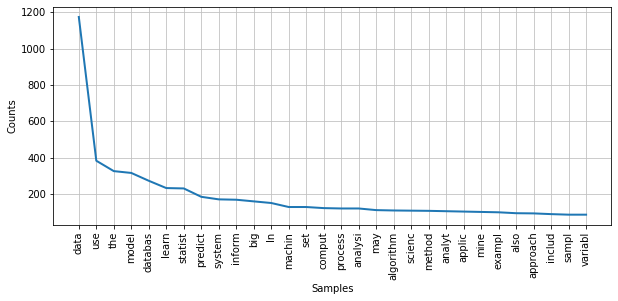

In [16]:
#finding the frequency distribution of the words
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,4))
fdist = FreqDist(processed_word_bucket_list)
fdist.plot(30, cumulative = False)
plt.show()
fig.savefig('freqDist.png', bbox_inches = "tight")

'/Users/ankurrastogi'